[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/Pesquisa-Operacional-III-A/blob/main/10_Intro_Distrib.ipynb)

## **Pesquisa Operacional III-A**

**Professor:**
- Diogo Ferreira de Lima Silva (TEP-UFF)


# Introdução


Em **simulação de eventos discretos**, estudaremos o comportamento de sistemas complexos, onde o estado do sistema muda em pontos discretos no tempo. 

Em vez de resolver equações analíticas, a simulação gera uma **história artificial do sistema** por meio da geração de eventos aleatórios, permitindo inferir o comportamento do sistema real.

Como discutido em sala, as técnicas empregadas possuem enorme relação com **Estatística**.

Nesta aula, aprenderemos:

- O papel das variáveis aleatórias na simulação;
- Como gerar números aleatórios com Python;
- Como usar distribuições de probabilidade em simulações;
- Um exemplo básico de simulação de chegada de clientes em uma fila.

# Variáveis Aleatórias


Uma **variável aleatória** é uma função que associa um número real a cada resultado possível de um experimento aleatório. 


**Elas são essenciais para simular incertezas e variabilidades dos sistemas do mundo real.**

Exemplos de variáveis aleatórias em sistemas reais:
- Tempo entre chegadas de clientes a um sistema;
- Tempo de atendimento em um caixa;
- Quantidade de itens produzidos com defeito.

As variáveis aleatórias são descritas por **distribuições de probabilidade**.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Vamos gerar alguns números aleatórios iniciais. 

Perceba que se você rodar várias vezes a célula abaixo, números diferentes serão gerados!

In [2]:
print("Número aleatório entre 0 e 1:", random.random())
print("Número inteiro entre 1 e 10:", random.randint(1, 10))
print("Número aleatório normal (media=0, desvio=1):", np.random.normal(0, 1))

Número aleatório entre 0 e 1: 0.05155343682677049
Número inteiro entre 1 e 10: 5
Número aleatório normal (media=0, desvio=1): 0.14066736785867634


Como vimos, as bibliotecas **random** e **numpy** podem ser utilizadas para geração de números aleatórios.

A biblioteca **numpy** possui algumas vantagens, tais como:

- velocidade
- gera arrays de uma só vez, compatíveis com arrays NumPy
- mais opções de distribuições


In [3]:
# Teste de velocidade para criar números aleatórios


import time

# random
start = time.time()
[random.random() for _ in range(10**6)]
print("random:", time.time() - start)

# numpy
start = time.time()
np.random.rand(10**6)
print("numpy:", time.time() - start)

random: 0.25896263122558594
numpy: 0.02767801284790039


## O que é uma Seed?

Ao gerar números aleatórios em Python, os valores **não são verdadeiramente aleatórios**, mas **pseudoaleatórios** — ou seja, calculados por algoritmos determinísticos.

A **semente (seed)** é um número inicial que define o estado interno do gerador. Ao usar a mesma seed, conseguimos **reproduzir exatamente os mesmos números aleatórios**.

Assim:
- É possível **reproduzir experimentos científicos** ou simulações.
- Facilita o *debug* de códigos que usam aleatoriedade.
- Garante que **resultados de testes** possam ser replicados por outras pessoas.

Para usar:

```python
np.random.seed(42)  # Qualquer número inteiro pode ser usado
```

**Vamos para um exemplo:**

In [4]:
# Definindo uma semente
np.random.seed(42)

# Gerando um vetor de 10 números aleatórios
amostra_1 = np.random.rand(10)

# Repetindo com a mesma semente 
np.random.seed(42)
amostra_2 = np.random.rand(10)

print("Primeira geração:")
print(amostra_1)

print("\nSegunda geração com mesma seed:")
print(amostra_2)

Primeira geração:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]

Segunda geração com mesma seed:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


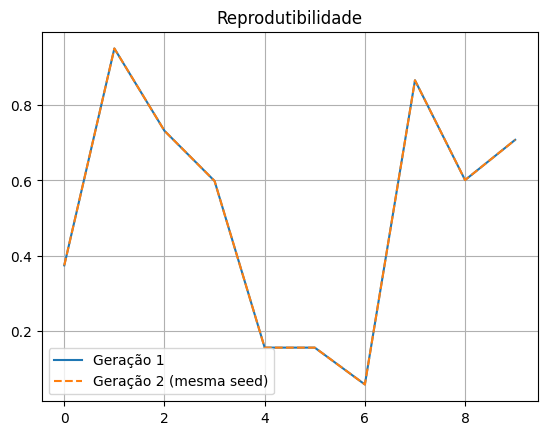

In [5]:
# Comparando visualmente
plt.plot(amostra_1, label="Geração 1")
plt.plot(amostra_2, linestyle="--", label="Geração 2 (mesma seed)")
plt.title("Reprodutibilidade")
plt.legend()
plt.grid(True)
plt.show()

# Distribuições de Probabilidade

In [6]:
np.random.seed(42)

### Distribuição Binomial

A distribuição binomial modela o número de **sucessos em n tentativas independentes**, com a mesma probabilidade \(p\) de sucesso.

Exemplo: número de peças com defeito em um lote de 20, se a probabilidade de defeito for 5%.

**Parâmetros:**
- `n`: número de tentativas
- `p`: probabilidade de sucesso

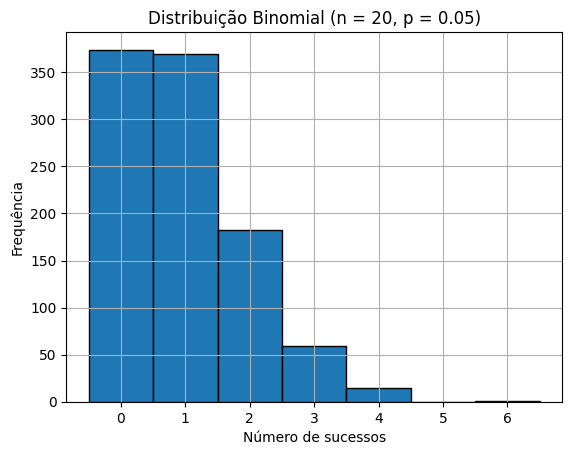

In [7]:
amostra_binomial = np.random.binomial(n=20, p=0.05, size=1000)

plt.hist(amostra_binomial, bins=range(0, 8), align='left', edgecolor='black')
plt.title("Distribuição Binomial (n = 20, p = 0.05)")
plt.xlabel("Número de sucessos")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Distribuição Multinomial

A distribuição multinomial é uma generalização da binomial para mais de dois resultados possíveis.

Exemplo: número de clientes que escolhem entre 3 tipos de produto.

**Parâmetros:**
- `n`: número de experimentos (clientes)
- `pvals`: lista com as probabilidades de cada categoria

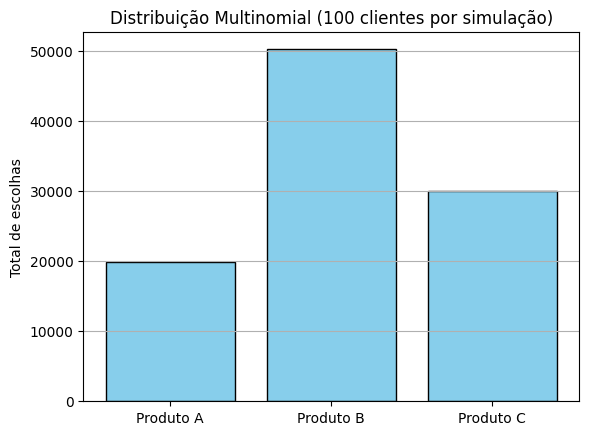

In [8]:
resultados = np.random.multinomial(n=100, pvals=[0.2, 0.5, 0.3], size=1000)

# Somar número de ocorrências por categoria
ocorrencias = resultados.sum(axis=0)

plt.bar(['Produto A', 'Produto B', 'Produto C'], ocorrencias, color='skyblue', edgecolor='black')
plt.title("Distribuição Multinomial (100 clientes por simulação)")
plt.ylabel("Total de escolhas")
plt.grid(True, axis='y')
plt.show()

### Distribuição de Poisson

A distribuição de Poisson modela o número de eventos que ocorrem em um intervalo fixo de tempo ou espaço, com uma taxa média \(\lambda\).

Exemplo: número de chamadas recebidas por minuto em um call center.

**Parâmetro:**
- `lam`: média (λ)

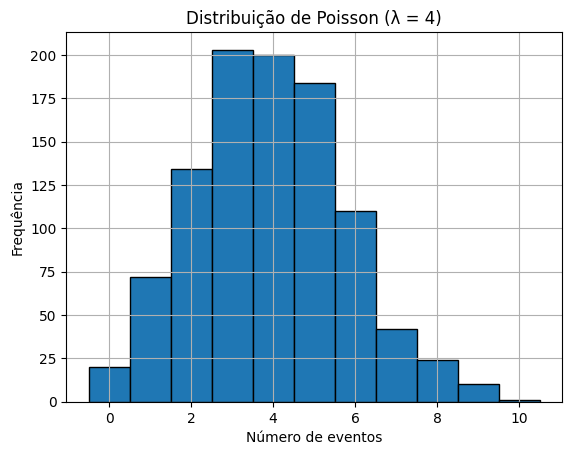

In [9]:
amostra_poisson = np.random.poisson(lam=4, size=1000)

plt.hist(amostra_poisson, bins=range(0, 12), align='left', edgecolor='black')
plt.title("Distribuição de Poisson (λ = 4)")
plt.xlabel("Número de eventos")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Distribuição Uniforme Discreta

A **distribuição uniforme discreta** é usada quando há **um número finito de valores inteiros possíveis**, todos com **a mesma probabilidade** de ocorrência.

Exemplos:
- Sorteio de um número entre 1 e 6 (como um dado);
- Seleção aleatória de um item de uma lista numerada.

No Python, usamos a função conforme abaixo:

```python
np.random.randint(início, fim+1, size)

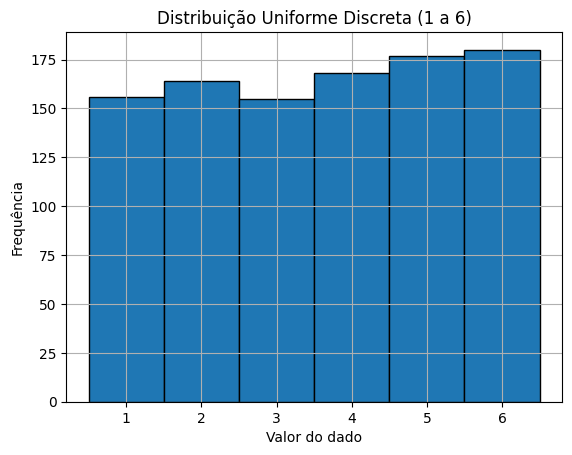

In [10]:
amostra_discreta = np.random.randint(low=1, high=7, size=1000)  # Simulando lançamento de dado

plt.hist(amostra_discreta, bins=range(1, 8), align='left', edgecolor='black')
plt.title("Distribuição Uniforme Discreta (1 a 6)")
plt.xlabel("Valor do dado")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Distribuição Uniforme Contínua

Na distribuição uniforme contínua, todos os valores no intervalo \([a, b]\) têm a **mesma probabilidade** de ocorrer.

É usada para modelar variáveis sem preferência por nenhum valor, como o tempo de atendimento de clientes em alguns sistemas simples.

**Parâmetros:**
- `low`: limite inferior \(a\)
- `high`: limite superior \(b\)

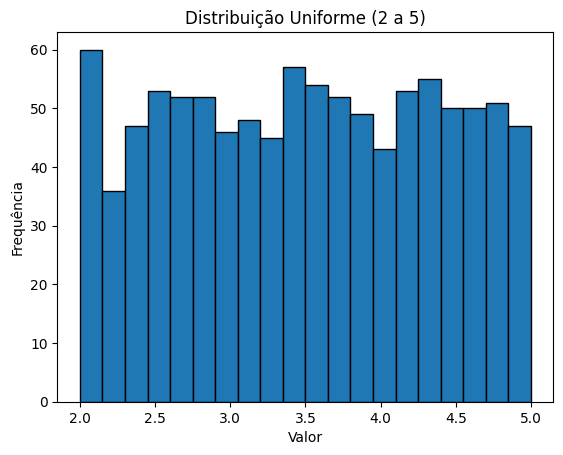

In [11]:
amostras = np.random.uniform(low=2, high=5, size=1000)

import matplotlib.pyplot as plt

plt.hist(amostras, bins=20, edgecolor='black')
plt.title("Distribuição Uniforme (2 a 5)")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

### Distribuição Exponencial

A distribuição exponencial é usada para modelar o **tempo entre eventos** em um processo de Poisson, como:
- Tempo entre chegadas de clientes;
- Tempo até falha de um equipamento.

**Parâmetro:**
- `scale` = $\frac{1}{\lambda}$, onde $\lambda$ é a taxa média de ocorrência.

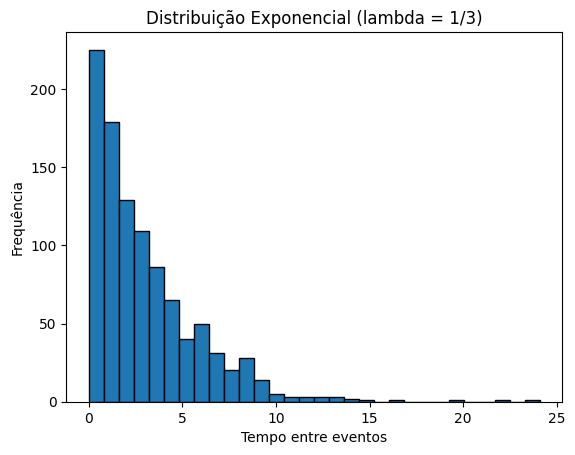

In [12]:
amostras_exp = np.random.exponential(scale=3.0, size=1000)

plt.hist(amostras_exp, bins=30, edgecolor='black')
plt.title("Distribuição Exponencial (lambda = 1/3)")
plt.xlabel("Tempo entre eventos")
plt.ylabel("Frequência")
plt.show()

### Distribuição Gama

A distribuição Gama é usada para modelar **tempos até a ocorrência de múltiplos eventos**. É uma generalização da distribuição exponencial.

Exemplo: tempo até que 3 clientes sejam atendidos.

**Parâmetros:**
- `shape` k: número de eventos
- `scale` θ: escala (média individual entre eventos)

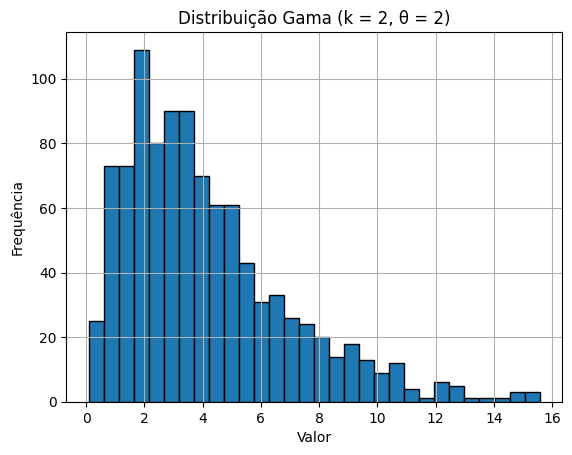

In [13]:
np.random.seed(42)
amostra_gama = np.random.gamma(shape=2.0, scale=2.0, size=1000)

plt.hist(amostra_gama, bins=30, edgecolor='black')
plt.title("Distribuição Gama (k = 2, θ = 2)")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Distribuição Beta

A distribuição Beta é útil quando queremos modelar **probabilidades** ou **proporções** que variam entre 0 e 1.

Exemplo: incerteza sobre a taxa de conversão de um site.

**Parâmetros:**
- `a`: parâmetro de forma α
- `b`: parâmetro de forma β

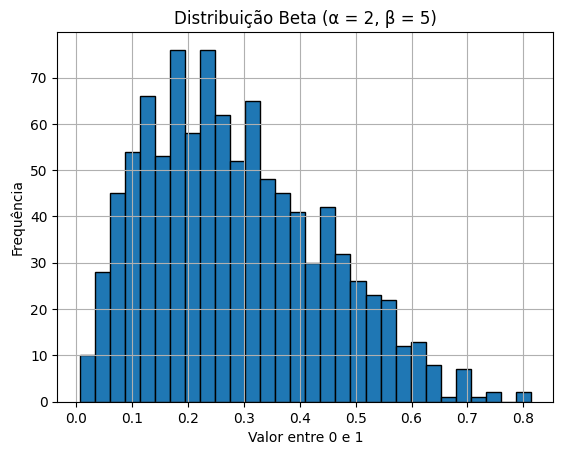

In [14]:
np.random.seed(42)
amostra_beta = np.random.beta(a=2.0, b=5.0, size=1000)

plt.hist(amostra_beta, bins=30, edgecolor='black')
plt.title("Distribuição Beta (α = 2, β = 5)")
plt.xlabel("Valor entre 0 e 1")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Distribuição Triangular

A distribuição triangular é útil quando temos uma estimativa **mínima**, **máxima** e **mais provável** para um valor.

Exemplo: tempo estimado para terminar uma tarefa.

**Parâmetros:**
- `left`: valor mínimo
- `mode`: valor mais provável
- `right`: valor máximo

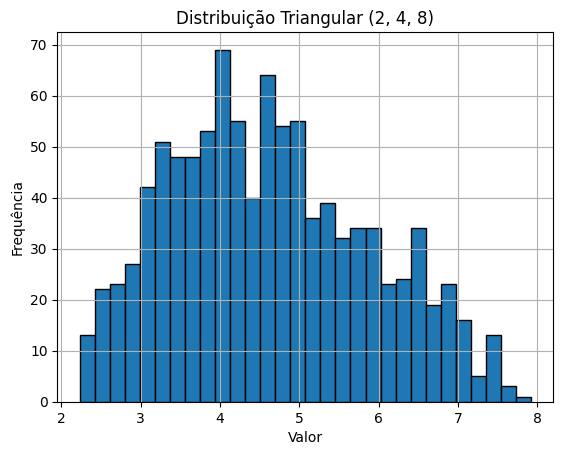

In [15]:
np.random.seed(42)
amostra_triangular = np.random.triangular(left=2.0, mode=4.0, right=8.0, size=1000)

plt.hist(amostra_triangular, bins=30, edgecolor='black')
plt.title("Distribuição Triangular (2, 4, 8)")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Distribuição Normal


A distribuição normal é uma das mais importantes em estatística. Muitos fenômenos naturais seguem esse padrão (altura, erros de medição...).

**Parâmetros:**
- `loc`: média \( \mu \)
- `scale`: desvio padrão \( \sigma \)

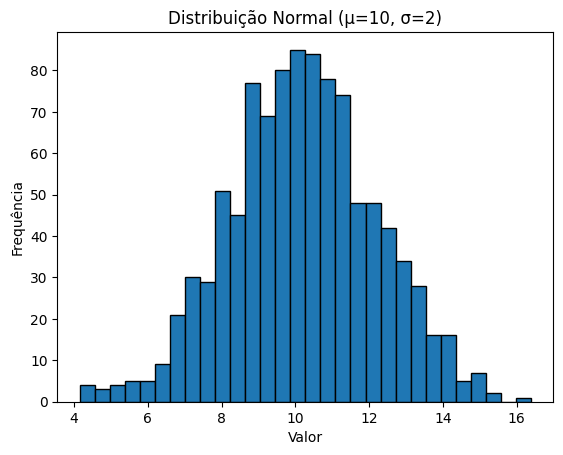

In [16]:
amostras_normal = np.random.normal(loc=10, scale=2, size=1000)

plt.hist(amostras_normal, bins=30, edgecolor='black')
plt.title("Distribuição Normal (μ=10, σ=2)")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

# Exercício

Suponha que temos uma fila onde os **tempos entre chegadas de clientes** seguem uma distribuição exponencial com média de 5 minutos. Simule a chegada de 20 clientes.

In [17]:
np.random.seed(42)
n_clientes = 20
tempos_entre_chegadas = np.random.exponential(scale=5.0, size=n_clientes)
instantes_de_chegada = np.cumsum(tempos_entre_chegadas)

In [18]:
tempos_entre_chegadas

array([ 2.34634045, 15.05060715,  6.58372847,  4.56471277,  0.84812435,
        0.84798146,  0.29919384, 10.05615432,  4.59541077,  6.15625031,
        0.10399654, 17.51778738,  8.93214772,  1.19343813,  1.00339494,
        1.01305711,  1.81376865,  3.71963915,  2.82768533,  1.72111496])

In [19]:
instantes_de_chegada

array([ 2.34634045, 17.3969476 , 23.98067607, 28.54538884, 29.39351319,
       30.24149465, 30.5406885 , 40.59684282, 45.19225359, 51.3485039 ,
       51.45250044, 68.97028781, 77.90243553, 79.09587365, 80.0992686 ,
       81.11232571, 82.92609436, 86.64573351, 89.47341885, 91.19453381])

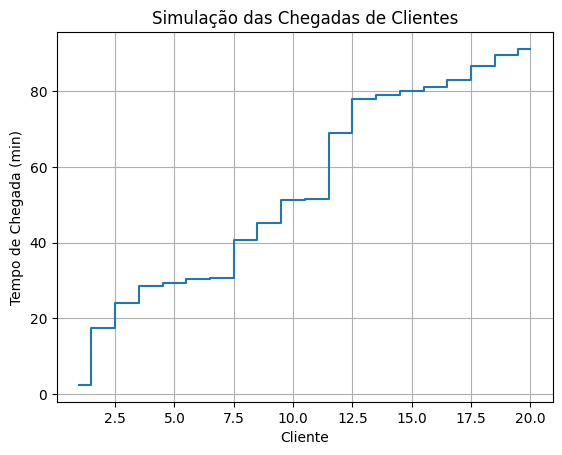

In [20]:
plt.step(range(1, n_clientes + 1), instantes_de_chegada, where='mid')
plt.xlabel("Cliente")
plt.ylabel("Tempo de Chegada (min)")
plt.title("Simulação das Chegadas de Clientes")
plt.grid(True)
plt.show()

### Exercício 2 

Você é responsável por simular uma fila de atendimento.

**Parâmetros:**
- Os tempos entre chegadas seguem uma distribuição exponencial com média 3 minutos;
- Os tempos de atendimento seguem uma distribuição uniforme entre 2 e 6 minutos.

**Tarefa:**
1. Simule a chegada de 30 clientes;
2. Calcule os tempos de início e término do atendimento de cada cliente (considere um único atendente);
3. Plote os gráficos:
    - Tempo de espera de cada cliente;
    - Tempo de sistema (espera + atendimento);

In [21]:
np.random.seed(42)

In [22]:
# Parâmetros
n_clientes = 30
media_chegada = 3.0
tempo_min_atendimento = 2.0
tempo_max_atendimento = 6.0

In [23]:
# Geração dos dados
tempos_entre_chegadas = np.random.exponential(scale= media_chegada, size=n_clientes)
instantes_chegada = np.cumsum(tempos_entre_chegadas)
tempos_atendimento = np.random.uniform(low=tempo_min_atendimento, high=tempo_max_atendimento, size=n_clientes)

In [24]:
# Análise da fila com um único atendente

inicio_atendimento = np.zeros(n_clientes)
fim_atendimento = np.zeros(n_clientes)
tempo_espera = np.zeros(n_clientes)
tempo_sistema = np.zeros(n_clientes)

for i in range(n_clientes):
    if i == 0:
        inicio_atendimento[i] = instantes_chegada[i]
    else:
        inicio_atendimento[i] = max(instantes_chegada[i], fim_atendimento[i - 1])
    fim_atendimento[i] = inicio_atendimento[i] + tempos_atendimento[i]
    tempo_espera[i] = inicio_atendimento[i] - instantes_chegada[i]
    tempo_sistema[i] = fim_atendimento[i] - instantes_chegada[i]

In [26]:
# Criar a tabela com pandas
tabela = pd.DataFrame({
    "Cliente": np.arange(1, n_clientes + 1),
    "Chegada (min)": instantes_chegada,
    "Início Atendimento (min)": inicio_atendimento,
    "Fim Atendimento (min)": fim_atendimento,
    "Tempo de Espera (min)": tempo_espera,
    "Tempo de Atendimento (min)": tempos_atendimento,
    "Tempo no Sistema (min)": tempo_sistema
})

# Exibir as primeiras linhas da tabela
tabela

,Cliente,Chegada (min),Início Atendimento (min),Fim Atendimento (min),Tempo de Espera (min),Tempo de Atendimento (min),Tempo no Sistema (min)
0,1,1.407804,1.407804,5.837984,0.000000,4.430179,4.430179
1,2,10.438169,10.438169,13.120265,0.000000,2.682096,2.682096
2,3,14.388406,14.388406,16.648612,0.000000,2.260206,2.260206
3,4,17.127233,17.127233,22.922775,0.000000,5.795542,5.795542
4,5,17.636108,22.922775,28.785304,5.286668,5.862528,11.149196
5,6,18.144897,28.785304,34.018893,10.640407,5.233589,15.873996
6,7,18.324413,34.018893,37.237348,15.694480,3.218455,18.912935
7,8,24.358106,37.237348,39.628037,12.879242,2.390688,15.269931
8,9,27.115352,39.628037,44.364969,12.512684,4.736932,17.249616
9,10,30.809102,44.364969,48.125579,13.555866,3.760610,17.316476


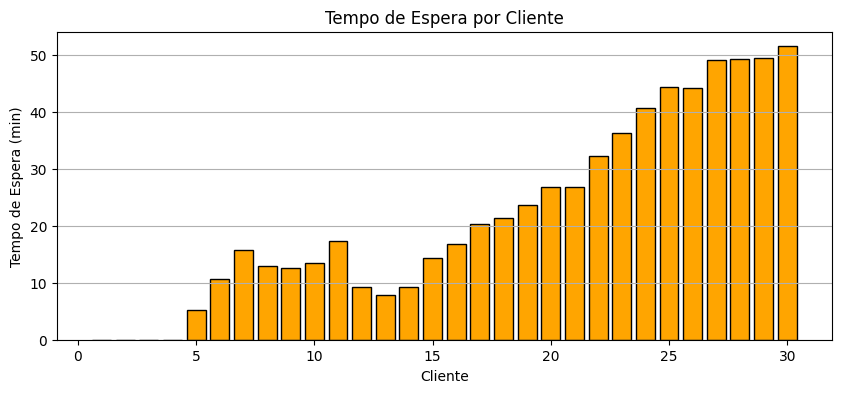

In [ ]:
# Tempo de Espera por cliente

plt.figure(figsize=(10, 4))
plt.bar(range(1, n_clientes + 1), tempo_espera, color='orange', edgecolor='black')
plt.title("Tempo de Espera por Cliente")
plt.xlabel("Cliente")
plt.ylabel("Tempo de Espera (min)")
plt.grid(True, axis='y')
plt.show()

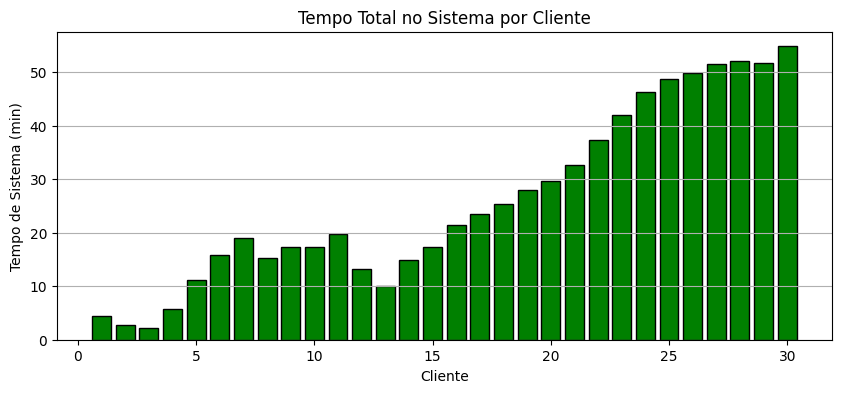

In [60]:
# Tempo Total no Sistema por Cliente

plt.figure(figsize=(10, 4))
plt.bar(range(1, n_clientes + 1), tempo_sistema, color='green', edgecolor='black')
plt.title("Tempo Total no Sistema por Cliente")
plt.xlabel("Cliente")
plt.ylabel("Tempo de Sistema (min)")
plt.grid(True, axis='y')
plt.show()